# Exploratory Data Analysis for Predicting Employee Attrition

#### This data is provided through the following [Kaggle Dataset](https://www.kaggle.com/datasets/HRAnalyticRepository/employee-attrition-data/data)

# What is employee attrition

"Employee attrition" is a decline in a company's workforce that results from workers quitting for different reasons not limited to: retirement, firing, outside opportunities, etc. To help reduce companies losing employees, employers typically take into consideration the following two measures:

Preventive measures: Proactively addressing issues by providing opportunities for development and training, in addition to cultivating a positive work atmosphere, to deter employees from leaving.

Reactive measures: Taking action in response to departures as they happen, which may cause hiccups and unplanned downtime.

It is possible to reduce employee attrition by comprehending the causes. Organizations may forecast future patterns in employee departures and take proactive measures to keep their talent by examining historical data. This has often been accomplished using rule-based techniques, but with the growth of advanced analytics and machine learning, data from various sources can be continuously collected and analyzed to predict and manage employee attrition more effectively.

# Setup

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

path = 'MFG10YearTerminationData.csv'
data = pd.read_csv(path)

### Common Functions Used in Imports

In [87]:
def categorize_job(title):
  """
  Categorizes various job titles into a different broad categories
  """
  for category, titles in job_categories.items():
      if title in titles:
          return category
  return None

def categorize_city(population):
  """
  Categorizes cities into different categories based on population
  """
  if population >= 100000:
      return 'urban'
  elif population >= 10000:
      return 'suburban'
  else:
      return 'rural'

def create_and_map_labels(df, column):
  """
  Creates a dictionary of labels for a given column
  """
  labels = {value: key for key, value in enumerate(df[column].unique())}
  df[column] = df[column].map(labels)
  return labels

# Data Description

There is one CSV file called HREmployee data. This file consists of data related to employees that worked at IBM. This includes qualitative and quantitative data related to each employee related to personal information and relationship to their job.

### View shape and general information of data

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [88]:
data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


### Display first few rows of data

In [89]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [90]:
data.shape

(49653, 18)

### Check number of NaN data points

In [91]:
data.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

### Drop any duplicate values and drop any unneeded columns

In [92]:
data.drop(['EmployeeID', 'birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   orighiredate_key     49653 non-null  object
 1   terminationdate_key  49653 non-null  object
 2   age                  49653 non-null  int64 
 3   length_of_service    49653 non-null  int64 
 4   city_name            49653 non-null  object
 5   department_name      49653 non-null  object
 6   job_title            49653 non-null  object
 7   store_name           49653 non-null  int64 
 8   gender_short         49653 non-null  object
 9   termreason_desc      49653 non-null  object
 10  termtype_desc        49653 non-null  object
 11  STATUS_YEAR          49653 non-null  int64 
 12  STATUS               49653 non-null  object
 13  BUSINESS_UNIT        49653 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.3+ MB


### Converting

In [93]:
job_categories = {
    'executive': ['CEO', 'VP Stores', 'Chief Information Officer', 'VP Human Resources', 'VP Finance'],
    'director': ['Director, Recruitment', 'Director, Accounts Receivable', 'Director, Accounting',
                 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology',
                 'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
                 'Director, Compensation'],
    'assistant': ['Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'Exec Assistant, Human Resources',
                  'Exec Assistant, Finance'],
    'manager': ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager', 'Bakery Manager',
                'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager'],
    'staff': ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier', 'Shelf Stocker', 'Recruiter',
              'HRIS Analyst', 'Accounting Clerk', 'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receivable Clerk',
              'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst', 'Investment Analyst', 'Systems Analyst',
              'Corporate Lawyer', 'Legal Counsel']
}

city_populations = {
    'Vancouver': 675218, 'Victoria': 367770, 'Nanaimo': 90504, 'New Westminster': 83200, 'Kelowna': 144576,
    'Burnaby': 257927, 'Kamloops': 90504, 'Prince George': 74333, 'Cranbrook': 19909, 'Surrey': 517887,
    'Richmond': 230584, 'Terrace': 19100, 'Chilliwack': 108324, 'Trail': 7814, 'Langley': 28394, 'Vernon': 43552,
    'Squamish': 20380, 'Quesnel': 9925, 'Abbotsford': 153524, 'North Vancouver': 58556, 'Fort St John': 20200,
    'Williams Lake': 11434, 'West Vancouver': 42473, 'Port Coquitlam': 58653, 'Aldergrove': 12363,
    'Fort Nelson': 3912, 'Nelson': 10750, 'New Westminister': 83200, 'Grand Forks': 4099, 'White Rock': 82238,
    'Haney': 82656, 'Princeton': 2708, 'Dawson Creek': 12578, 'Bella Bella': 1028, 'Ocean Falls': 130,
    'Pitt Meadows': 19620, 'Cortes Island': 1095, 'Valemount': 1025, 'Dease Lake': 340, 'Blue River': 158
}

data['job_title_category'] = data['job_title'].apply(categorize_job)
data['city_population'] = data['city_name'].map(city_populations)
data['city_size_category'] = data['city_population'].apply(categorize_city)

# Plotting Descriptive Charts of Data

### Correlation Heatmap Between Columns in Employee Dataset

<ipython-input-94-64d2c34e5c12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='job_title_category', order=data['job_title_category'].value_counts().index, palette='viridis')


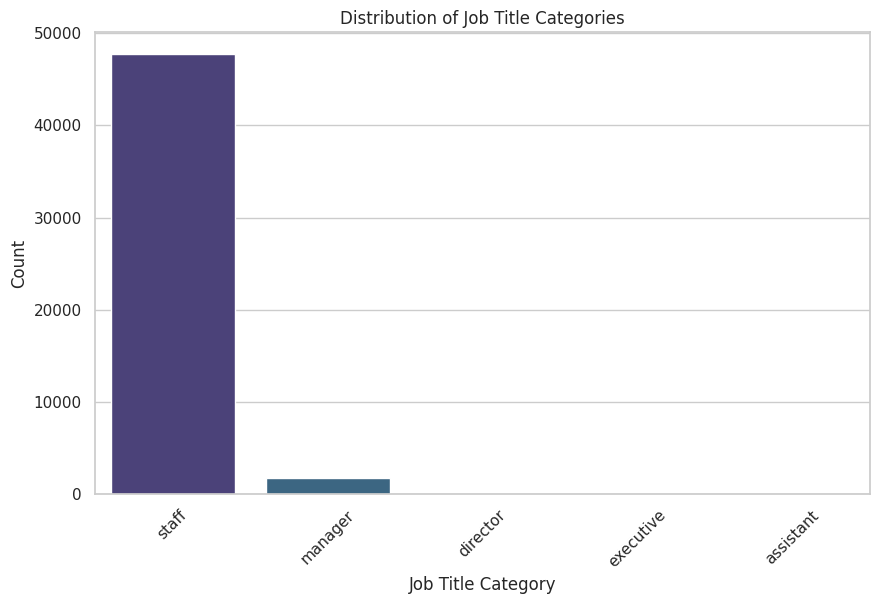

<ipython-input-94-64d2c34e5c12>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='city_size_category', order=data['city_size_category'].value_counts().index, palette='viridis')


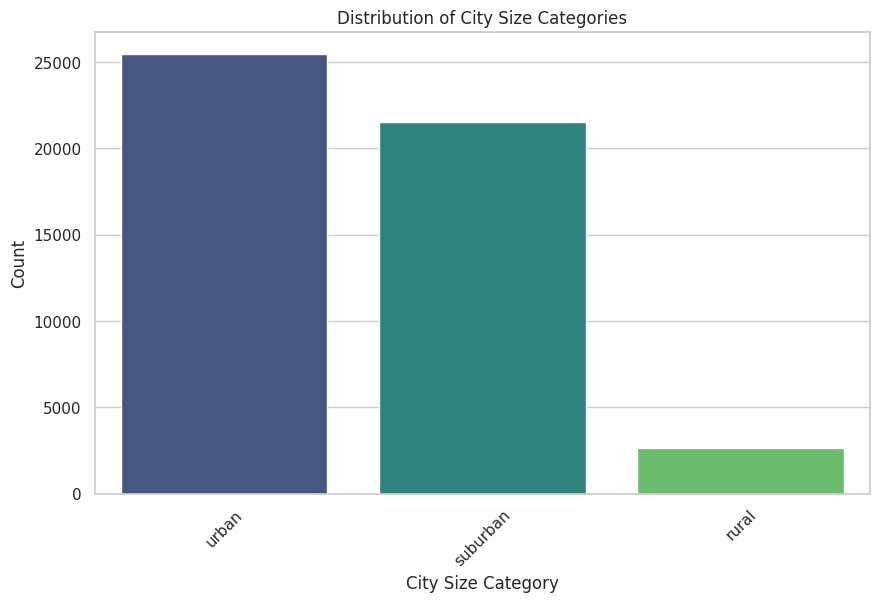

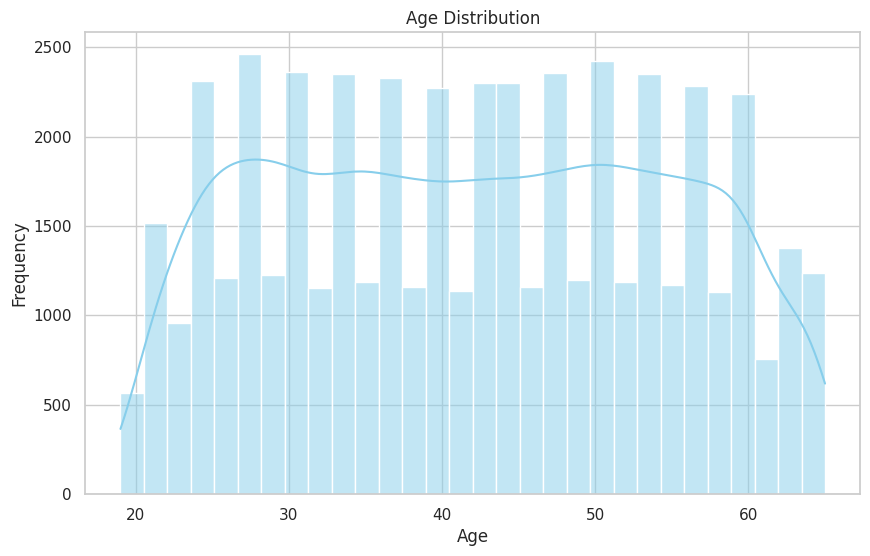

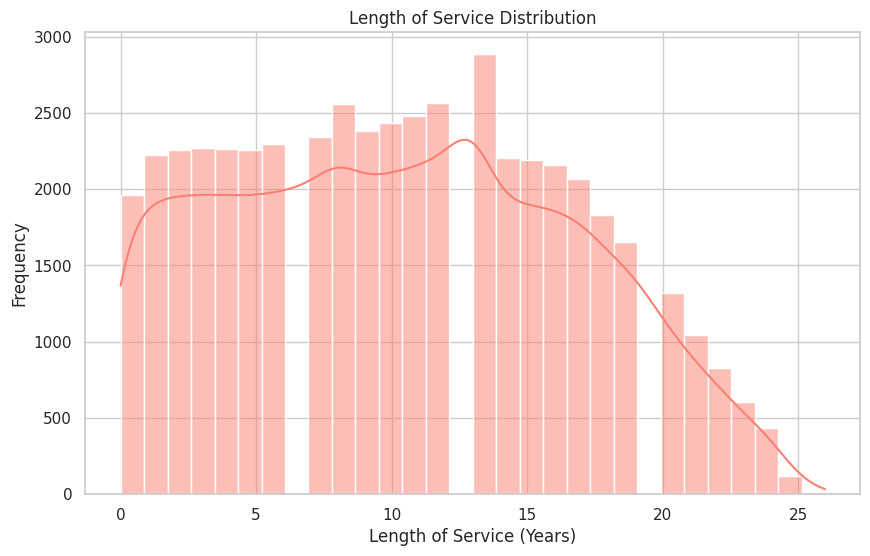

<ipython-input-94-64d2c34e5c12>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender_short', palette='viridis')


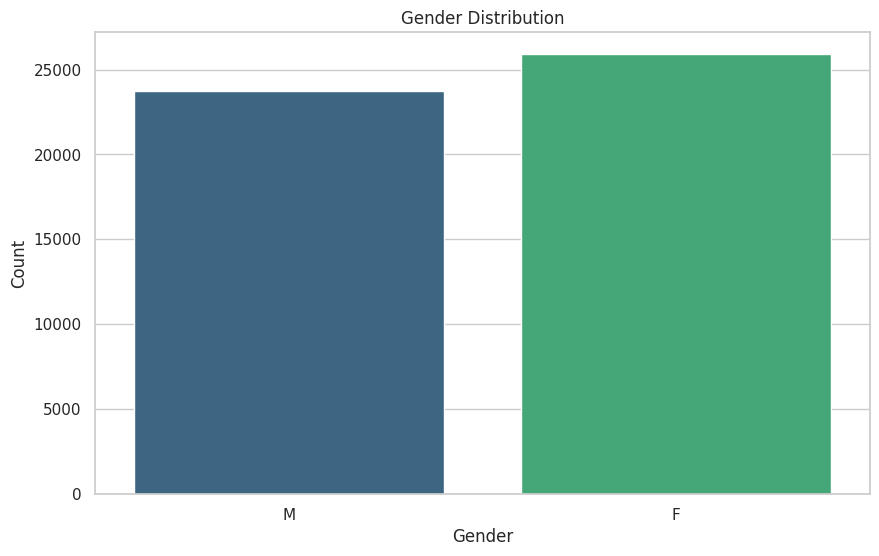

<ipython-input-94-64d2c34e5c12>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='STATUS', palette='viridis')


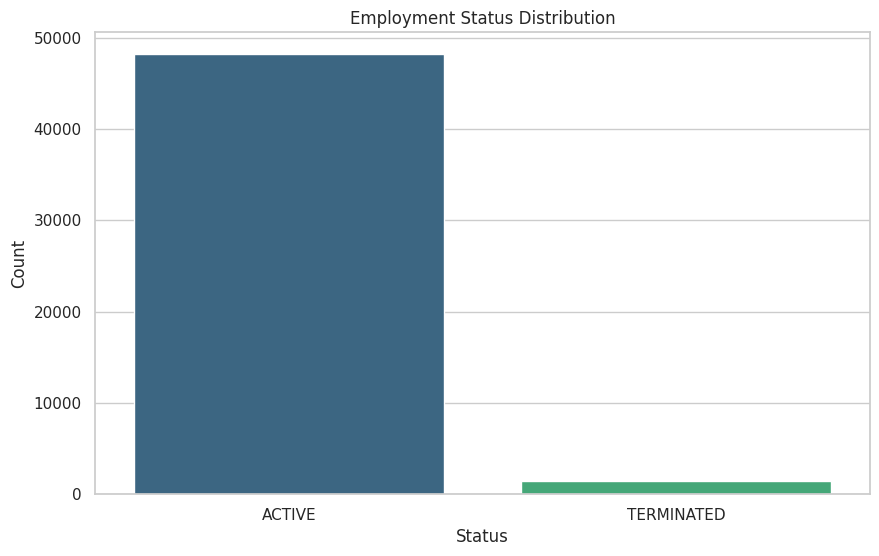

In [94]:
sns.set(style="whitegrid")

# Distribution of job title categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='job_title_category', order=data['job_title_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Job Title Categories')
plt.xlabel('Job Title Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of city size categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='city_size_category', order=data['city_size_category'].value_counts().index, palette='viridis')
plt.title('Distribution of City Size Categories')
plt.xlabel('City Size Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Length of service distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['length_of_service'], bins=30, kde=True, color='salmon')
plt.title('Length of Service Distribution')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender_short', palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Employment status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='STATUS', palette='viridis')
plt.title('Employment Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

From the dataset, we can see that the `STATUS` is much lower than that of the active employees. Furthermore, some interesting observations can be made related to the age distribution and length of service. It looks as though there the age of distribution seems to be evenly distributed with general spikes in age every 2/3 year intervals (i.e. 21, 23, 25, 27, 30, etc). Related to the length of service distribution we see that there is a steep drop off after about 17 years of service at the companies.

### Box plots of Categorical Features compared to Attrition

# Pair Plots of dataset

<ipython-input-95-30e0d9db4211>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_upsampled, x='job_title_category', y='age', palette='viridis')


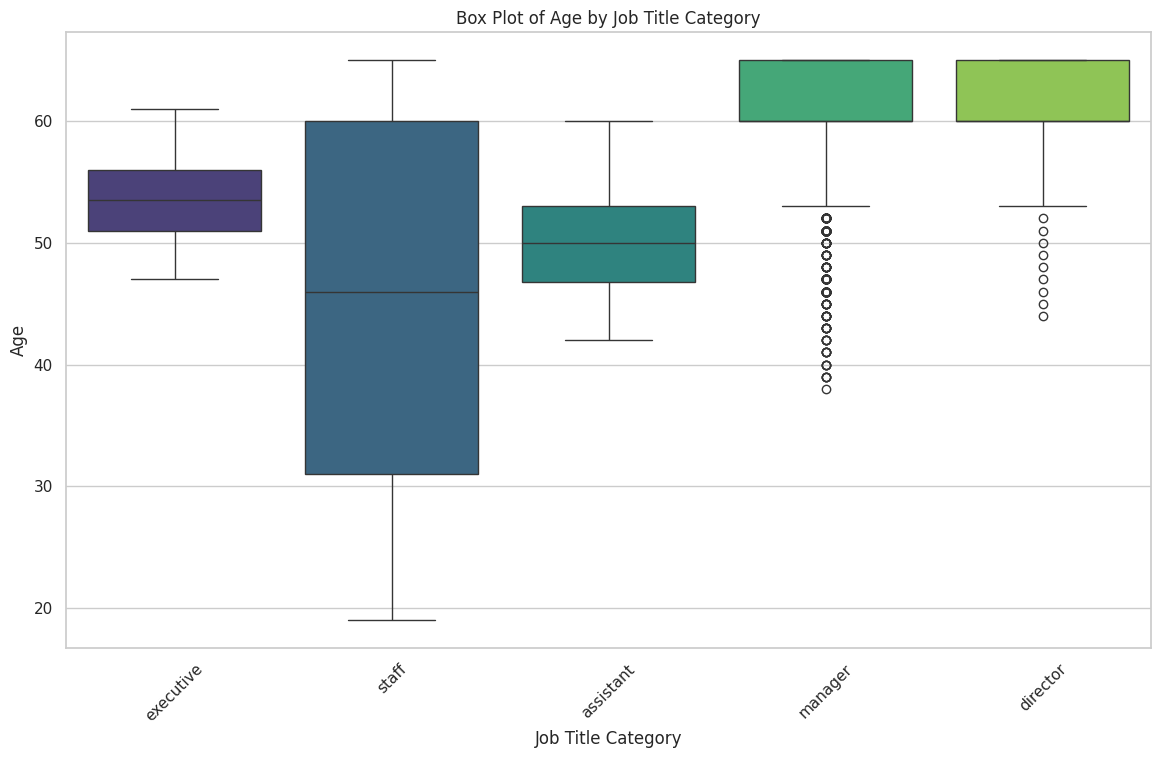

<ipython-input-95-30e0d9db4211>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_upsampled, x='job_title_category', y='length_of_service', palette='viridis')


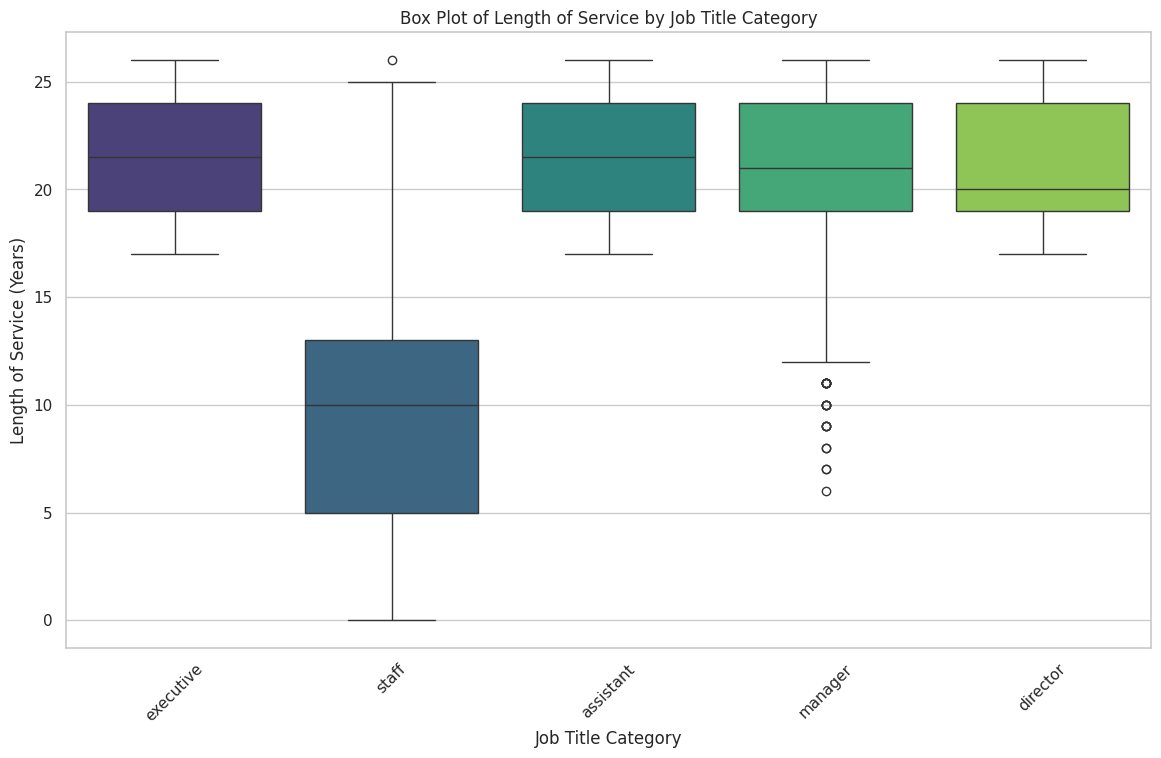

<ipython-input-95-30e0d9db4211>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_upsampled, x='city_size_category', y='age', palette='viridis')


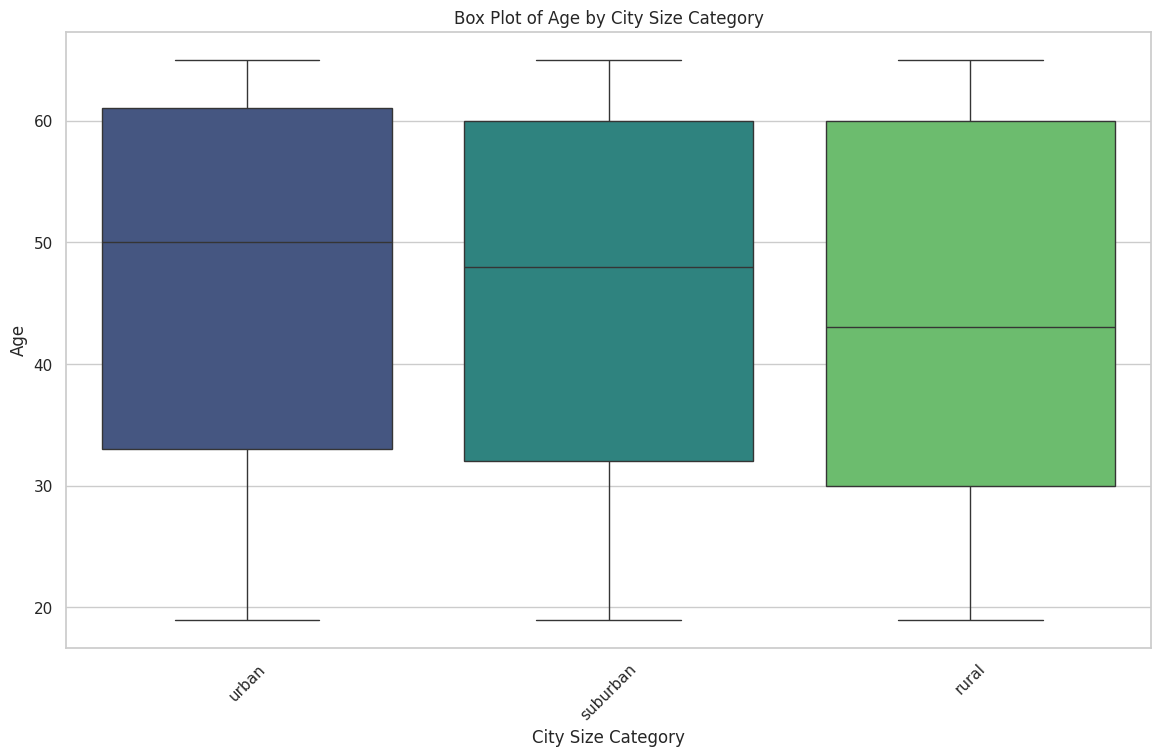

<ipython-input-95-30e0d9db4211>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_upsampled, x='city_size_category', y='length_of_service', palette='viridis')


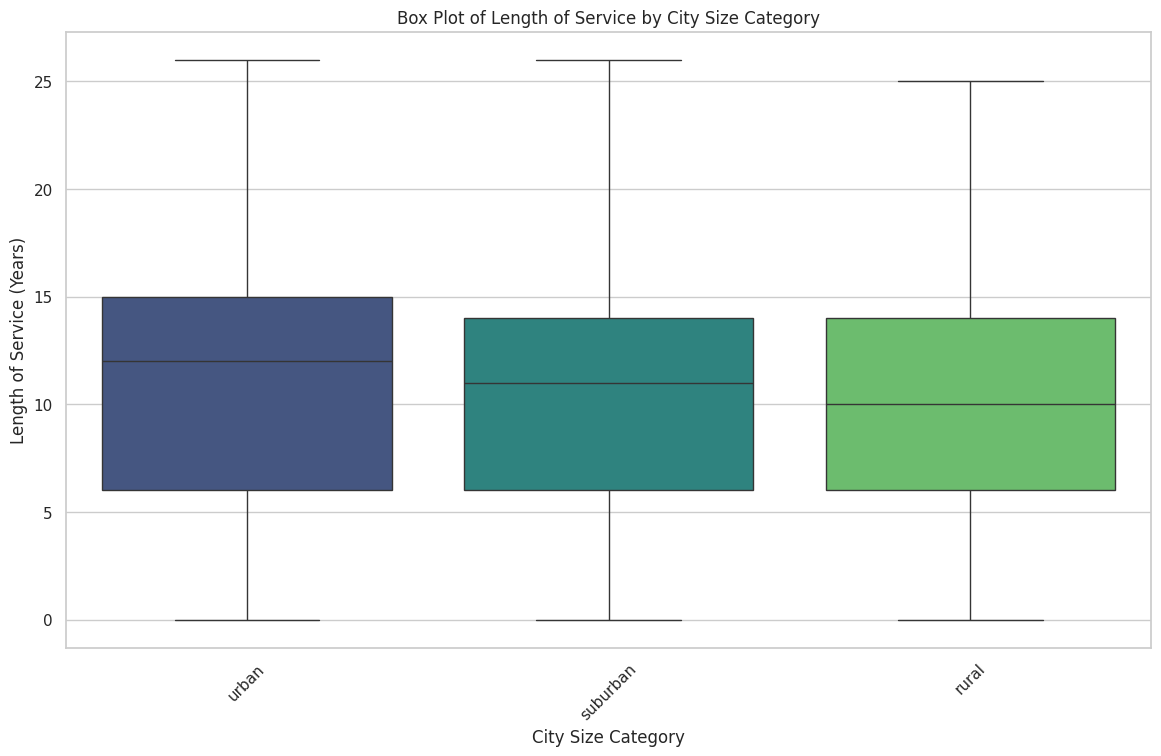

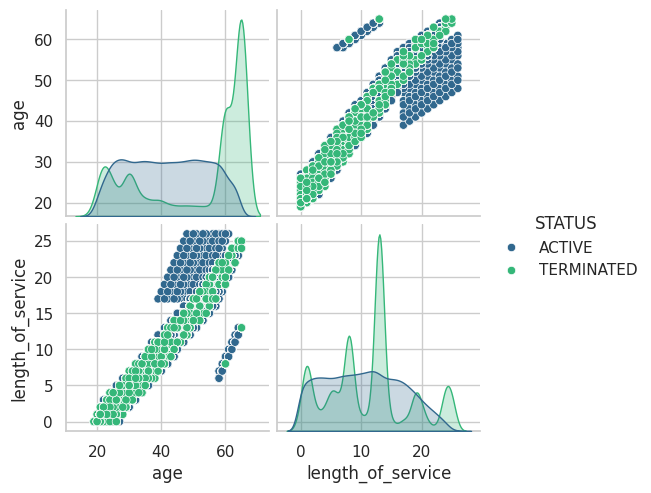

In [95]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_upsampled, x='job_title_category', y='age', palette='viridis')
plt.title('Box Plot of Age by Job Title Category')
plt.xlabel('Job Title Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Box plot for Length of Service by Job Title Category
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_upsampled, x='job_title_category', y='length_of_service', palette='viridis')
plt.title('Box Plot of Length of Service by Job Title Category')
plt.xlabel('Job Title Category')
plt.ylabel('Length of Service (Years)')
plt.xticks(rotation=45)
plt.show()

# Box plot for Age by City Size Category
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_upsampled, x='city_size_category', y='age', palette='viridis')
plt.title('Box Plot of Age by City Size Category')
plt.xlabel('City Size Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Box plot for Length of Service by City Size Category
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_upsampled, x='city_size_category', y='length_of_service', palette='viridis')
plt.title('Box Plot of Length of Service by City Size Category')
plt.xlabel('City Size Category')
plt.ylabel('Length of Service (Years)')
plt.xticks(rotation=45)
plt.show()

# Pairplot of numerical features colored by Employment Status
sns.pairplot(df_upsampled, hue='STATUS', vars=['age', 'length_of_service'], palette='viridis')
plt.show()

From the box plots we seem some reasonable trends where the length of service by job title category matches what would be expected, where staff members worker for shorter periods of time compared to upper management and executives. Similarly, it applies age by job title category where we would expect a larger range of ages working compared to managers and other executive level employees typically being older with more job experience.

### Data Processing

Lets modify the labels for each relevant column as well as grab imports for our models.

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import uniform, randint
from sklearn.decomposition import PCA
import time

# Apply the function to each relevant column
city_name_label = create_and_map_labels(data, 'city_name')
department_name_label = create_and_map_labels(data, 'department_name')
job_title_label = create_and_map_labels(data, 'job_title')
gender_short_label = create_and_map_labels(data, 'gender_short')
term_desc_label = create_and_map_labels(data, 'termreason_desc')
termtype_desc_label = create_and_map_labels(data, 'termtype_desc')
status_label = create_and_map_labels(data, 'STATUS')
business_label = create_and_map_labels(data, 'BUSINESS_UNIT')


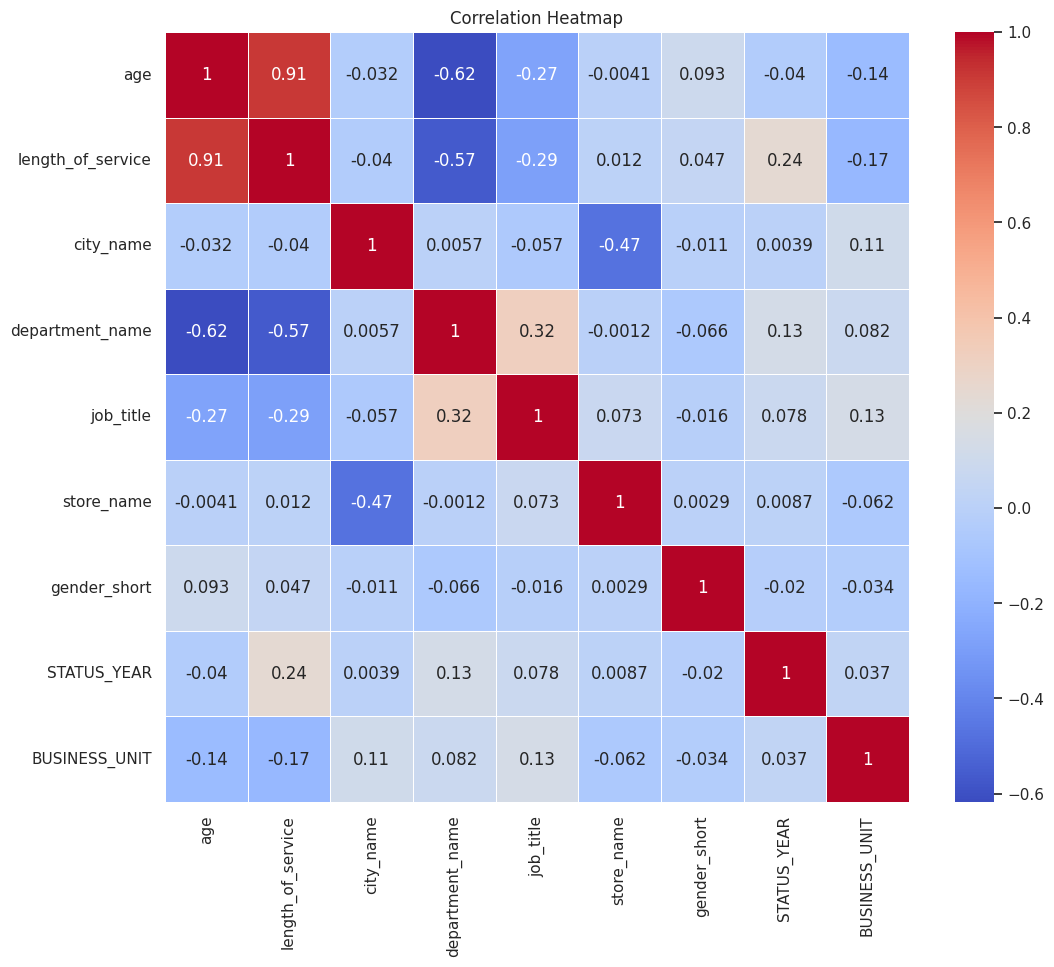

In [100]:
x = data[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = data[['STATUS']]

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = x.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Data Modeling

For this analysis we'll model the data with several different Machine Learning models to assess which would be best suited for the dataset. We'll involve 6 different models which include:

*   Logistic Regression
    *  Built for binary classification tasks which could work well in this dataset looking at yes/no for attrition
*   Decision Tree
    *    Able to capture non-linear relationships between features and target variable.
*   Random Forest
    *    Taking advantage of multiple decision trees can provide for more accuracy over a singular decision tree model and help resolve overfitting issues
*   K-Nearest Neighbors
    *     Flexible alternative to some of the other models that doesn't require any specific data distribution





### Splitting data into training and testing sets and applying a standard scaler

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Flatenning train and test variables to 1 dimension
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

numerical_transformer = StandardScaler()

x_train = numerical_transformer.fit_transform(X_train)
x_test = numerical_transformer.transform(X_test)

### Creating a pipeline with just the model

In [122]:
# Model Pipelines
models = {
    'Logistic Regression': Pipeline(steps=[('classifier', LogisticRegression(max_iter=1000))]),
    'Decision Tree': Pipeline(steps=[
                                     ('classifier', DecisionTreeClassifier())]),
    'Random Forest': Pipeline(steps=[
                                     ('classifier', RandomForestClassifier())]),
    'K-Nearest Neighbors': Pipeline(steps=[
                                           ('classifier', KNeighborsClassifier())]),
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"{model_name} Accuracy: {score:.4f}\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9704

Training Decision Tree...
Decision Tree Accuracy: 0.9903

Training Random Forest...
Random Forest Accuracy: 0.9912

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9795



### Utilizing GridSearchCV to identify best hyperparameters

*   Logistic Regression
    * `classifier__penalty`: norm used for penalization
      *  `l2` and `none` hyperparameters selected for L2 regularization (Ridge) and no regularization
    *   `classifier__c`: inverse of regularization strength
          * [0.01, 0.1, 1, 10, 100] - commonly used values
    *   `classifier__fit_intercept`: define if intercept should be included
          * [True, False]
*   Decision Tree
    *    `classifier__criterion`: measure quality of split
          * `gini`: probability of incorrectly classifying a randomly chosen element
          * `entropy`: information gain
    *     `classifier__min_samples_split`: minimum number of samples to split internal node
          * [2, 5, 10]
    *     `classifier__max_depth`: max depth of the tree
          * [None, 10, 20, 30]
*   Random Forest
    *     `classifier__min_samples_split`: minimum number of samples to split internal node
          * [2, 5, 10]
    *     `classifier__max_depth`: max depth of the tree
          * [None, 10, 20, 30]
    *     `classifier__n_estimators`: number of trees in forest
          * [100, 200, 300]
    *     `classifier__min_samples_leaf`: minumum number of samples to be at leaf node
          * [1, 2, 4]
*   K-Nearest Neighbors
    *     `classifier__n_neighbors`: number of neighbors to use
          * [3, 5, 7, 9]
    *     `classifier__weights`
          *       `uniform`: all points are weighted equally in same neighborhood
          *       `distance`: weight given by inverse of distance
    *     `classifieir__metric`: distance metric
          *       `euclidean`: Euclidean distance.
          *       `manhattan`: Manhattan distance.
          *       `minkowski`: Minkowski distance.

In [123]:
# Hyperparameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'classifier__penalty': ['l2', 'none'],  # Removed 'l1' and 'elasticnet'
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__fit_intercept': [True, False]
    },
    'Decision Tree': {
        'classifier__criterion' : ['gini', 'entropy'],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    }
}
# Train and evaluate each model using GridSearchCV
best_estimators = {}
for model_name, model_pipeline in models.items():
  print(f"Training {model_name} with GridSearchCV...")

  search = GridSearchCV(model_pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
  start = time.time()
  search.fit(X_train, y_train)
  end = time.time()
  print(f"Time taken: {end - start}")
  best_estimators[model_name] = search.best_estimator_
  score = search.score(X_test, y_test)
  print(f"{model_name} best parameters: {search.best_params_}")
  print(f"{model_name} best cross-validation accuracy: {search.best_score_:.4f}")
  print(f"{model_name} test accuracy: {score:.4f}\n")

  y_pred = search.predict(X_test)
  y_pred_proba = search.predict_proba(X_test)[:, 1]

  print(f"Classification Report for {model_name}:")
  print(classification_report(y_test, y_pred))

  roc_auc = roc_auc_score(y_test, y_pred_proba)
  print(f"ROC-AUC score for {model_name}: {roc_auc:.4f}\n")

Training Logistic Regression with GridSearchCV...
Time taken: 7.2204625606536865
Logistic Regression best parameters: {'classifier__C': 0.1, 'classifier__fit_intercept': False, 'classifier__penalty': 'l2'}
Logistic Regression best cross-validation accuracy: 0.9699
Logistic Regression test accuracy: 0.9706

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9638
           1       1.00      0.00      0.01       293

    accuracy                           0.97      9931
   macro avg       0.99      0.50      0.50      9931
weighted avg       0.97      0.97      0.96      9931

0
ROC-AUC score for Logistic Regression: 0.7355

Training Decision Tree with GridSearchCV...
Time taken: 1.9123926162719727
Decision Tree best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Decision Tree best cross-validation accuracy: 0.9912
Decisio